# Visualization with python Library

Reference(참고 문서) : [@zzsza's blog](https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/)

- Python에서 데이터 시각화를 할때 다양한 라이브러리를 사용한다.
- Library list
    - `matplotlib`
    
    - `seaborn`
    
    - `plotnine`
    
    - `folium`
    
    - `plot.ly`
    
    - `pyecharts`
 

## Matplotlib
---
- `pandas`의 DataFrame을 바로 시각화 할 때도 내부적으로 `matplotlib`을 사용합니다.
- 설치
```zsh
pip3 install matplotlib
```
- 공식 튜토리얼 문서 :  [Matplotlib Tutorials](https://matplotlib.org/tutorials/index.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.2.2


### Figure
- `Figure`은 **그림이 그려지는 도화지**라고 생각
    - `Figure` 생성 --> `plt.subplots`로 도화지를 분할해 각 부분에 그래프를 그리는 방식
    
    - `plt.figure` 를 명시적으로 표현해주는 것이 좋지만, **보통 plot함수에서 자동으로 `figure`를 생성해주기 때분에 자주 사용하진 않는다.**
    
    - 현재 `figure`에 접근 할 필요성이 있다면, `plt.gcf()`로 접근 가능
    
    
- size 조절 --> `fig.set_size_inches(18.5, 10.5)`
    - `plt.figure(figsize = (10, 5)`
    
    - `plt.rcParams['figure.figsize'] = (10, 7)`
    
### Axes
- `Axes`는 plot이 그려지는 공간

### Axis
- plot의 축

### Examples
#### figure, axes 직접 설정하는 경우

<Figure size 432x288 with 0 Axes>

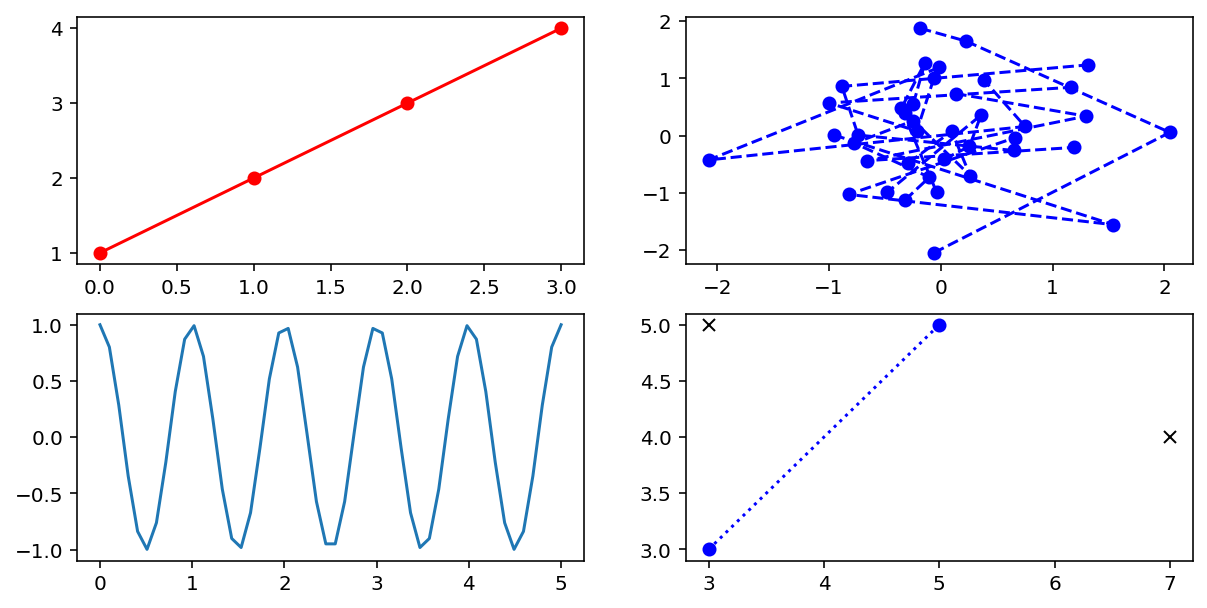

In [7]:
# figure 설정.
fig = plt.figure()

# figure (전체) 크기 설정, axes 개수 설정.
fig, ax_lst = plt.subplots(2, 2, figsize=(10,5))

# ax_lst[행][열]에 원하는 그림을 그려줄 수 있음.
ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')

# 지금까지 그린 그림을 보여줌.
plt.show()


#### pandas.DataFrame을 바로 시각화 하는 경우



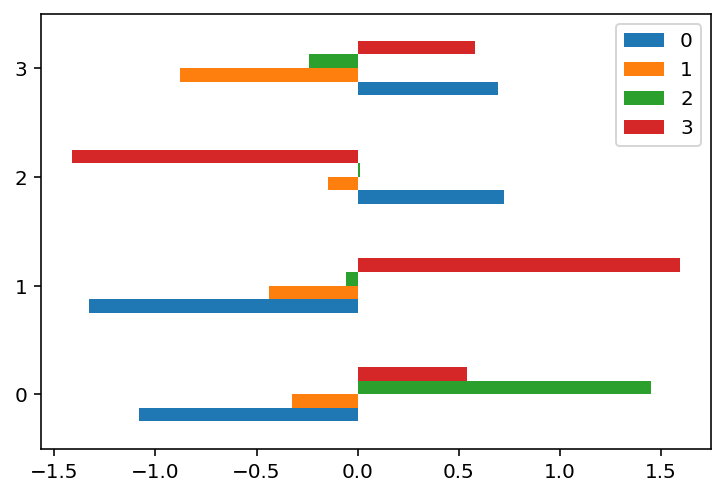

In [8]:
# pandas.DataFrame 생성
df = pd.DataFrame(np.random.randn(4,4))

# pandas.DataFrame 에서 바로 Matplotlib 사용
df.plot(kind='barh')

#### [R] 라이브러리 `ggplot` 스타일로 그리는 방법
아래의 옵션 추가

참고: 
`ggplot`뿐만아니라 `print(plt.style.available)` 을 통해 원하는 스타일을 변경할 수 있다.

In [10]:
plt.style.use('ggplot')

# for matplotlib version 1.3 or lower,
#pd.options.display.mpl_style = 'default'

<Figure size 432x288 with 0 Axes>

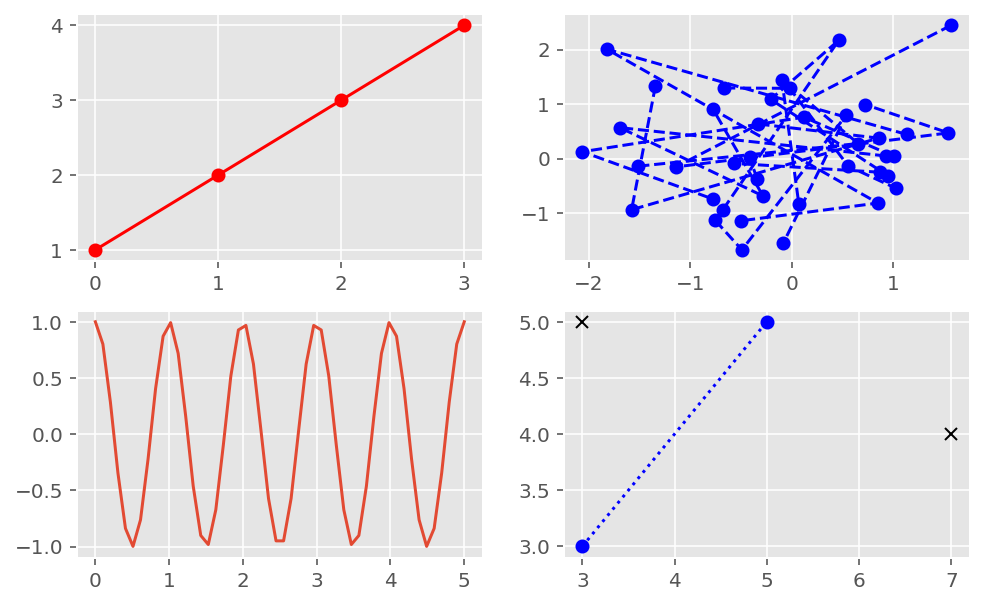

In [11]:
fig = plt.figure()
fig.suptitle('ggplot style')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

## Seaborn
---
- `seaborn` is **based** on, and **dependent** on `Matplotlib`
    + 색 테마
    + 차트   
        ...와 같은 기능 추가
        

- `Matplotlib`에 없는 그래프등을 가지고 있다.
    - 히트맵
    - 카운터플랏
        ... 등등
        
- 설치
```
pip3 install seaborn
```

- 공식 튜토리얼 문서 :  [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html)


In [18]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.10.1


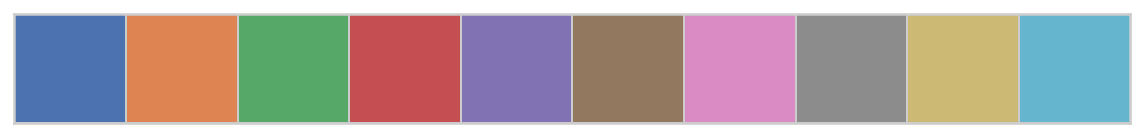

In [20]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

### replot
- **x :** x 축에 들어갈 데이터의 data의 column name    
- **y :** y 축에 들어갈 데이터의 data의 column name  
- **hue, size, style:**   
    data의 column name이 들어가고(**Categorical variable**로 인식),   
    각각 점의 **색상, 크기, 모양**을 지정해준 카테고리별로 다르게 표현해준다.
    
    
- **row, col :**  
    data의 column name이 들어가고(**Categorical variable**로 인식),  
    각각 행, 열의 방향으로 지정해준 data의 column name을 기준으로 카테고리 별로 데이터를 구분해준다.
    
- **kind :** 어떤 plot을 그릴지 표기,  
    Options are:
    + 'scatter' :  **(default)**
    + 'line'

- **height :** 한 면의 높이(height of a facet)에 해당하는 값을 지정
- **aspect :** 한 면의 높이에 지정해준 비율만큼 곱한 값을 너비의 길이로 설정.  
    width size = height*aspect

- **data** : data

In [27]:
# Seaborn 내장 데이터 호출
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


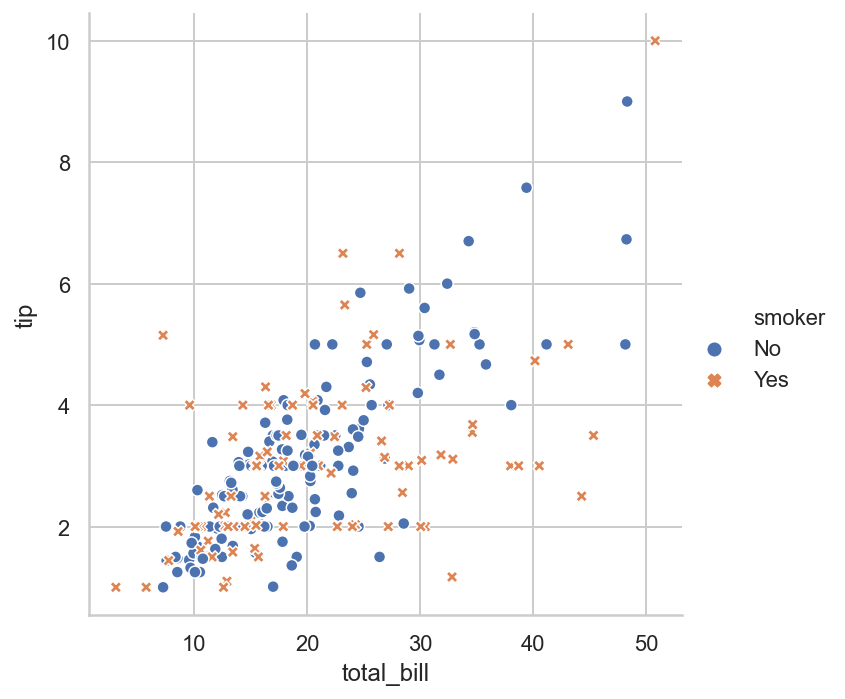

In [30]:
# replot 함수 사용 예제
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

In [32]:
# 데이터 생성: 두 가지 변수 --> 'time', 'value'
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

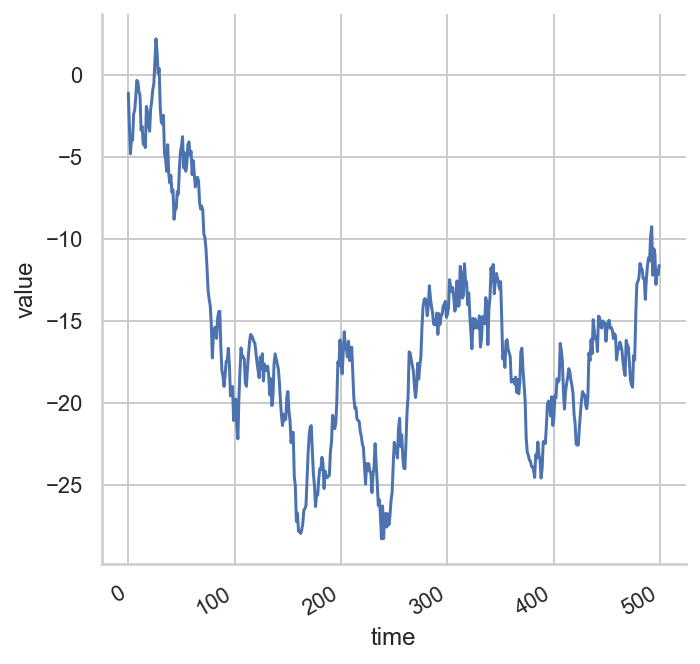

In [40]:
# 
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Catplot
- **kind :** 어떤 plot을 그릴지 표기,  
    Options are:
    + 'point'
    + 'bar'
    + 'strip'
    + 'swarm'
    + 'box'
    + 'violin'
    + 'boxen'
    
- **orient :** 범주별로 쌓이는 데이터의 방향
    - v : (vertical,**default**) 세로방향
    - h : (horizontal) 가로방향

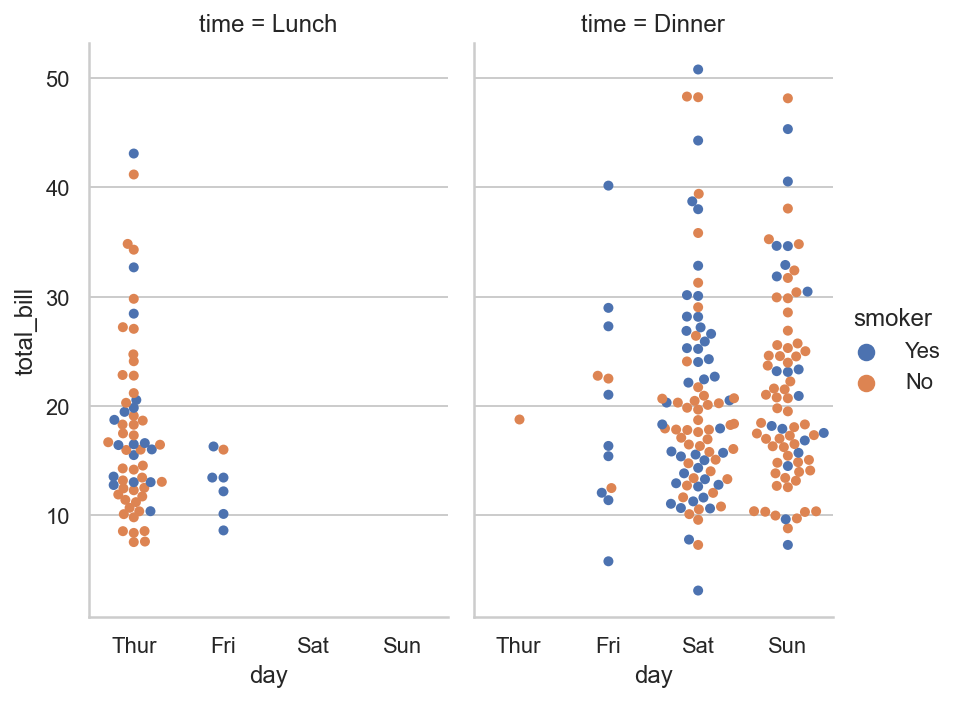

In [44]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)

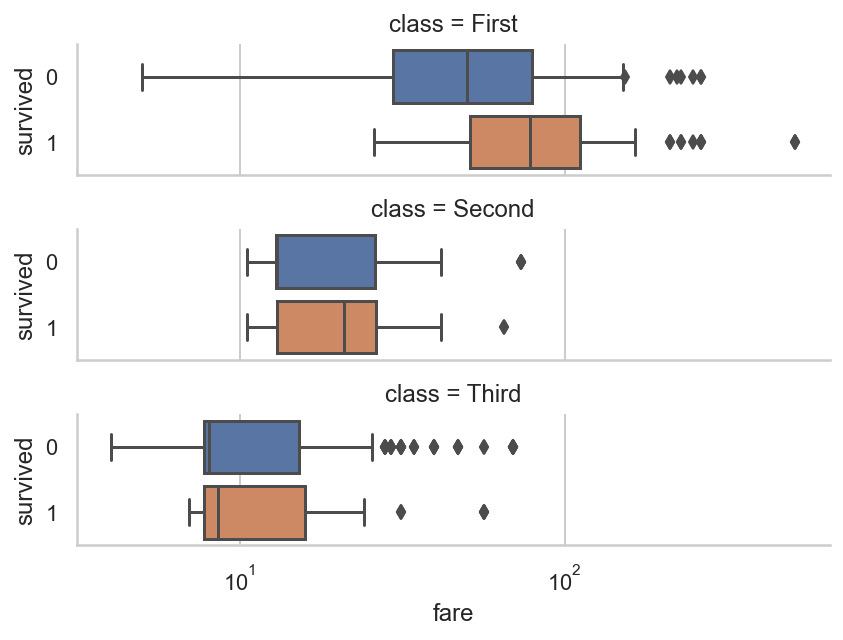

In [45]:
# 데이터 입력
titanic = sns.load_dataset("titanic")

# catplot-box
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")

## Pairplot

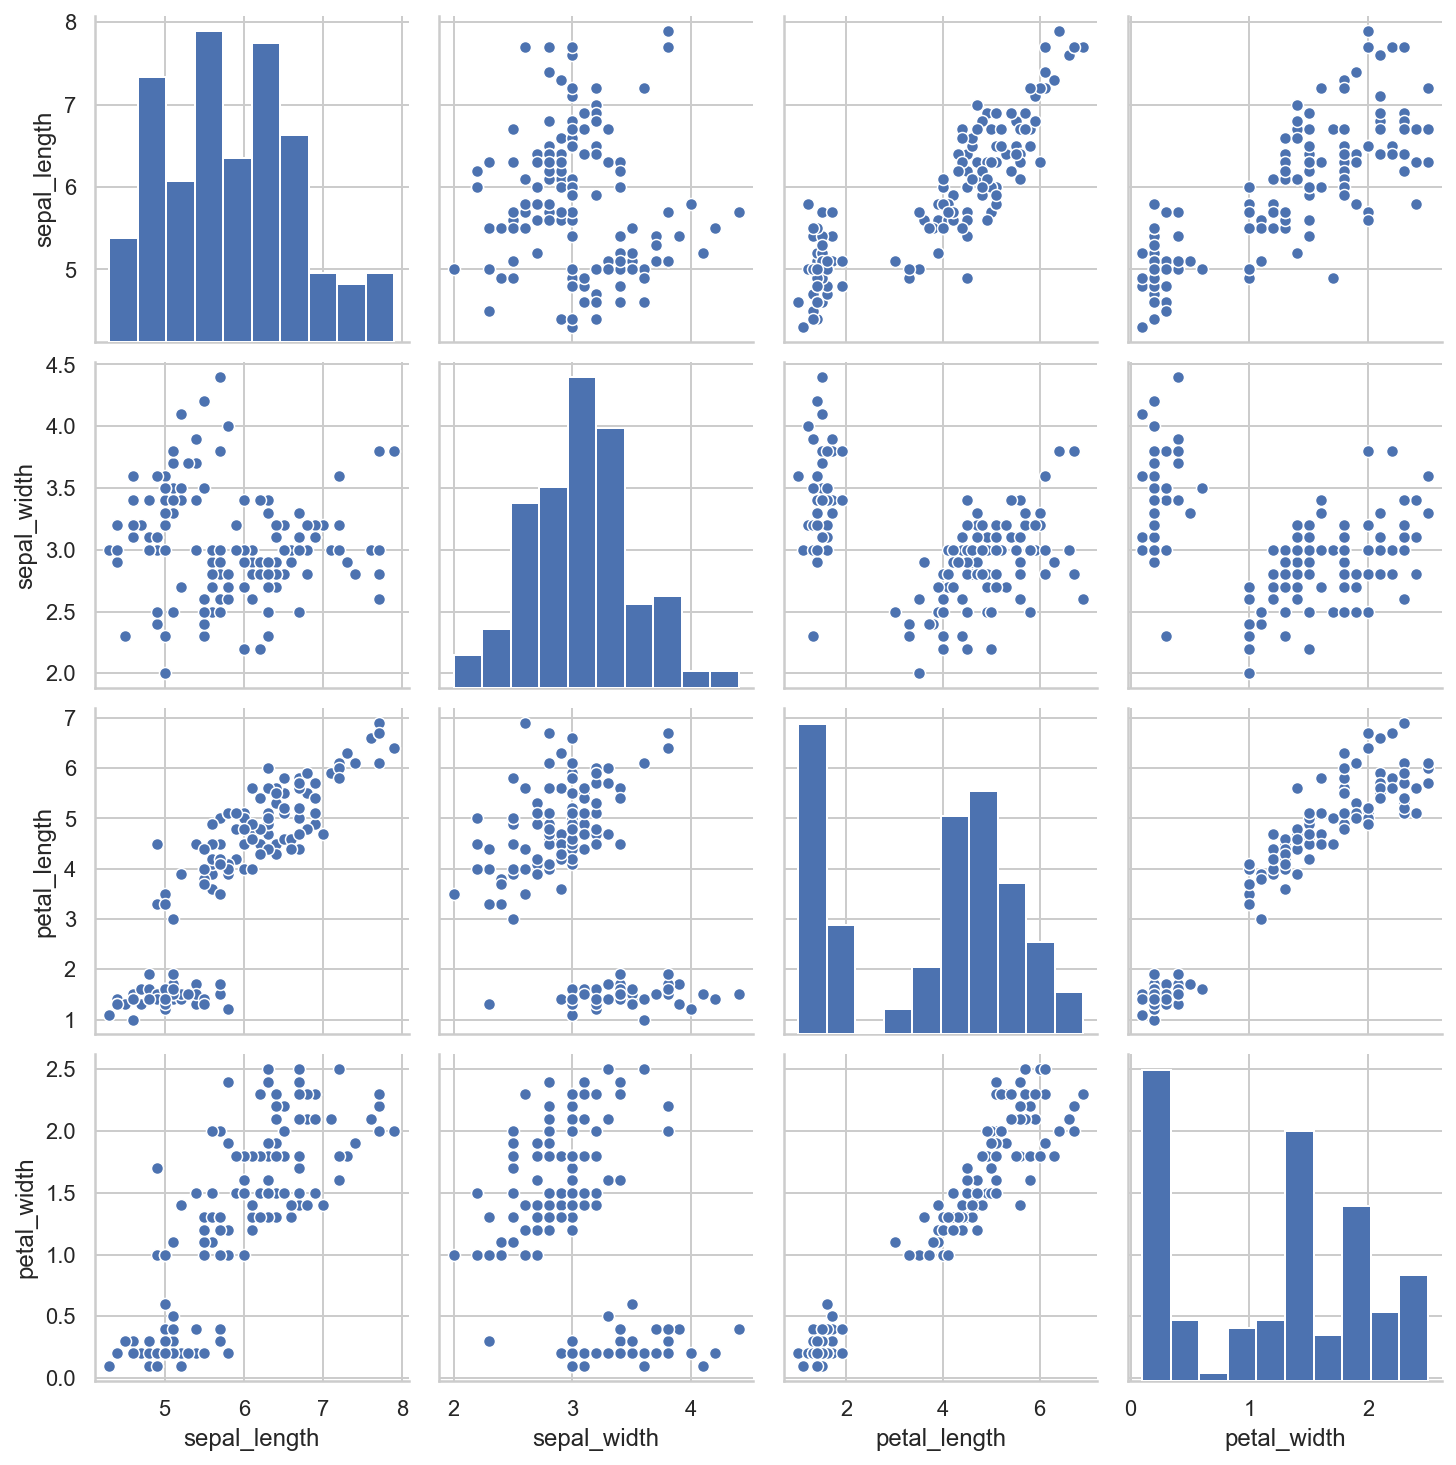

In [47]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)